In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
x_train = pd.read_csv(r"training_data/Training Data/Logistic_X_Train.csv").values
y_train = pd.read_csv(r"training_data/Training Data/Logistic_Y_Train.csv").values


In [100]:
x_train = (x_train - x_train.mean())/x_train.std()

In [101]:
x_test = pd.read_csv(r"test_data/Test Cases/Logistic_X_Test.csv")

In [102]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [103]:
def hypothesis(x, theta):
    return sigmoid(np.dot(x, theta))

In [104]:
def error(x, y, theta):
    
    m = x.shape[0]
    err = 0
    
    for i in range(m):
        hy = hypothesis(x[i], theta)
        err += y[i]*np.log2(hy) + (1 - y[i])*np.log2(1 - hy)
        
    return err/m

In [105]:
def get_grad(x, y, theta):
    
    m = x.shape[0]
    grad = np.zeros(theta.shape)
    
    for i in range(m):
        hy = hypothesis(x[i], theta)
        x_ = x[i].reshape((-1, 1))
        grad += (y[i] - hy)*x_
        
    return grad/m

In [106]:
def gradient(x, y, learning_rate = .01):
    
    theta = np.zeros((x.shape[1], 1))
    
    err_list = []
    
    for i in range(3000):
        theta = theta + learning_rate*get_grad(x, y, theta)
        e = error(x, y, theta)
        err_list.append(e)
        
    return theta, err_list

In [107]:
fTheta, err_list = gradient(x_train, y_train)
print(fTheta)

[[-1.47423657]
 [ 0.48874809]
 [-2.04240241]]


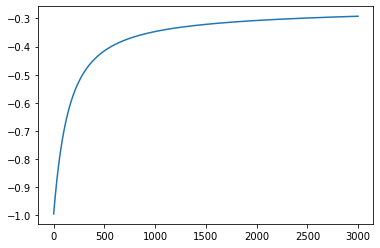

In [108]:
plt.plot(err_list)
plt.show()

In [109]:
y_pred = hypothesis(x_test, fTheta)

In [110]:
y_pred = np.array(y_pred)

In [112]:
df = pd.DataFrame(y_pred, columns=["label"])

df.to_csv(r"C:\Users\prakhar\Desktop\class\export.csv", index=False)